First, we are reading the dataset from google drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

star_dataset  = pd.read_csv('https://raw.githubusercontent.com/sayeemabdullah/Machine-Learning-Classifiers/master/Dataset/Star99999_raw.csv')

star_dataset.keys()


Index(['Unnamed: 0', 'Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType'], dtype='object')

We can see that the raw dataset have the first feature unnamed. so we will now name the first feature.

In [ ]:
star_dataset = star_dataset.rename(columns = {'Unnamed: 0': 'index'}, inplace = False)

star_dataset.keys()

Index(['index', 'Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType'], dtype='object')

Now, let us have a look at the total number of rows in our dataset. Then, let us have a look at the first 5 rows of our dataset.

In [ ]:
print('Total number of rows and columns in our dataset are:', star_dataset.shape)
print('\n')
print('The first 5 rows of our dataset are:') 
print('\n')
print(star_dataset.head())


Total number of rows and columns in our dataset are: (99999, 6)


The first 5 rows of our dataset are:


   index   Vmag      Plx   e_Plx     B-V SpType
0      0   9.10     3.54    1.39   0.482     F5
1      1   9.27    21.90    3.10   0.999    K3V
2      2   6.61     2.81    0.63  -0.019     B9
3      3   8.06     7.75    0.97   0.370    F0V
4      4   8.55     2.87    1.11   0.902  G8III


Let us now see how many null values there are in the dataset

In [ ]:
star_dataset.isnull().sum()

index        0
Vmag         0
Plx          0
e_Plx        0
B-V          0
SpType    2622
dtype: int64

We can see that 2622 values from our target label SpType are missing, therefore, we must remove those 2622 rows from our dataset

In [ ]:
print('Total number of rows BEFORE dropping the null valued rows:', star_dataset.shape)

star_dataset_subset1 = star_dataset.dropna(axis=0, subset=['SpType'])

print('Total number of rows AFTER dropping the null valued rows:', star_dataset_subset1.shape)

Total number of rows BEFORE dropping the null valued rows: (99999, 6)
Total number of rows AFTER dropping the null valued rows: (97377, 6)


Now, Let us have a look at the datatype of our preprocessed dataset

In [ ]:
star_dataset_subset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97377 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   97377 non-null  int64 
 1   Vmag    97377 non-null  object
 2   Plx     97377 non-null  object
 3   e_Plx   97377 non-null  object
 4   B-V     97377 non-null  object
 5   SpType  97377 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.2+ MB


We can see a problem here. We can see that the datatype of Vmag, Plx, e_Plx, B-V are object type datatype. However, when we open the csv file in microsoft excel, we can see that these columns contain numerical values. Therefore, now we have to convert the object type datatype to integer/float type by casting them.

In [ ]:
star_dataset_subset1["Vmag"] = pd.to_numeric(star_dataset_subset1["Vmag"], downcast="float", errors='coerce')
star_dataset_subset1["Plx"] = pd.to_numeric(star_dataset_subset1["Plx"], downcast="float", errors='coerce')
star_dataset_subset1["e_Plx"] = pd.to_numeric(star_dataset_subset1["e_Plx"], downcast="float", errors='coerce')
star_dataset_subset1["B-V"] = pd.to_numeric(star_dataset_subset1["B-V"], downcast="float", errors='coerce')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

By setting errors to coerce, the entries where the casting could not be done would be replaced by NaN values. The rows with NaN values would now be removed from our dataset.

Now, let us see how many null values are there in our dataset

In [ ]:
star_dataset_subset1.isnull().sum()

index       0
Vmag        0
Plx       109
e_Plx     109
B-V       546
SpType      0
dtype: int64

Now, let us eliminate the rpws with the null values

In [ ]:
star_dataset_subset2 = star_dataset_subset1.dropna(axis=0, subset=['Plx', 'e_Plx', 'B-V'])

print('Total number of rows BEFORE dropping the null valued rows:', star_dataset_subset1.shape)
print('Total number of rows AFTER dropping the null valued rows:', star_dataset_subset2.shape)

Total number of rows BEFORE dropping the null valued rows: (97377, 6)
Total number of rows AFTER dropping the null valued rows: (96742, 6)


Now let us do some feature engineering. It is mentioned in the dataset description that there is an additional column which could be added which measures the Absolute Magnitude (AbsMag) of the stars using the already provided features. The formula of Absolute Magniture is :
 
AbsMag = Vmag + 5(log(Plx)+1)

In [ ]:
df_Vmag = star_dataset_subset2['Vmag']
df_Plx = star_dataset_subset2['Plx']
df_AbsMag = df_Vmag + 5* (np.log10(abs(df_Plx))+1)


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


We can see that we are having an error because there are some rows which has Plx=0. Since we are taking the log of Plx, and log of 0 is infinite, we have to drop the rows which have the 0 as the value of Plx.

In [ ]:
df_Plx = df_Plx[df_Plx != 0]

df_AbsMag = df_Vmag + 5* (np.log10(abs(df_Plx)) + 1)


Now, we would add the df_AbsMag to the our preprocessed dataset

In [ ]:
star_dataset_subset2['AbsMag'] = df_AbsMag
star_dataset_subset2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Vmag,Plx,e_Plx,B-V,SpType,AbsMag
0,0,9.10,3.54,1.39,0.482,F5,16.845016
1,1,9.27,21.90,3.10,0.999,K3V,20.972221
2,2,6.61,2.81,0.63,-0.019,B9,13.853533
3,3,8.06,7.75,0.97,0.370,F0V,17.506508
4,4,8.55,2.87,1.11,0.902,G8III,15.839410
...,...,...,...,...,...,...,...
99993,99993,7.92,3.93,1.24,0.133,Am...,15.891963
99994,99994,8.72,3.07,0.87,0.097,B3,16.155693
99996,99996,8.08,1.07,0.68,1.094,G5,13.226919
99997,99997,6.98,2.97,0.76,-0.143,B1.5V,14.343782


Now, we will preprocess the SpType column.
The SpType column refers to the type of star, whether it is a Dwarf, a Gaint, or other type.

In the string of SpType, if there are any of these 4 roman numbers, it would be considered as a Dwarf : I, II, III, VII

In the string of SpType, if there are any of these 3 roman numbers, it would be considered as a Gaint : IV, V, VI

If the string of SpType does not contain any of these mentioned roman number, it would be considered as others.

So now, i will implement a code which would convert the values in SpType.
If the value is 0, it would represent a Dwarf.
If the value is 1, it would represent a Gaint.
If the value is 2, it would represent others.


. 


In [ ]:
target_list = star_dataset_subset2['SpType'].tolist() 
#target_list[3]

for i in range(len(target_list)):
    if "V" in target_list[i]:
     if "VII" in target_list[i]: 
           target_list[i] = 0 # VII is Dwarf
     else:
            target_list[i] = 1 # IV, V, VI are Giants
    elif "I" in target_list[i]: 
        target_list[i] = 0 # I, II, III are Dwarfs
    else: 
        target_list[i] = 2 # None

star_dataset_subset2['Target_Label']= target_list

star_dataset_subset2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,index,Vmag,Plx,e_Plx,B-V,SpType,AbsMag,Target_Label
0,0,9.10,3.54,1.39,0.482,F5,16.845016,2
1,1,9.27,21.90,3.10,0.999,K3V,20.972221,1
2,2,6.61,2.81,0.63,-0.019,B9,13.853533,2
3,3,8.06,7.75,0.97,0.370,F0V,17.506508,1
4,4,8.55,2.87,1.11,0.902,G8III,15.839410,0
...,...,...,...,...,...,...,...,...
99993,99993,7.92,3.93,1.24,0.133,Am...,15.891963,2
99994,99994,8.72,3.07,0.87,0.097,B3,16.155693,2
99996,99996,8.08,1.07,0.68,1.094,G5,13.226919,2
99997,99997,6.98,2.97,0.76,-0.143,B1.5V,14.343782,1


Now, let us delete the index column of our dataset, as it does not provide us with any meaningful data to feed the model

In [ ]:
star_dataset_subset3 = star_dataset_subset2.drop(['index'], axis=1)
star_dataset_subset3

,Vmag,Plx,e_Plx,B-V,SpType,AbsMag,Target_Label
0,9.10,3.54,1.39,0.482,F5,16.845016,2
1,9.27,21.90,3.10,0.999,K3V,20.972221,1
2,6.61,2.81,0.63,-0.019,B9,13.853533,2
3,8.06,7.75,0.97,0.370,F0V,17.506508,1
4,8.55,2.87,1.11,0.902,G8III,15.839410,0
...,...,...,...,...,...,...,...
99993,7.92,3.93,1.24,0.133,Am...,15.891963,2
99994,8.72,3.07,0.87,0.097,B3,16.155693,2
99996,8.08,1.07,0.68,1.094,G5,13.226919,2
99997,6.98,2.97,0.76,-0.143,B1.5V,14.343782,1


We are only going to classify star of type Dwarf(labeled as 0), or Gaint (labeled as 1), so we can get rid of stars of other type (labeled with 2)

In [ ]:
star_dataset_subset4 = star_dataset_subset3[star_dataset_subset3.Target_Label != 2]


print('Total number of rows BEFORE dropping the rows with label 2:', star_dataset_subset3.shape)
print('Total number of rows AFTER dropping the rows with label 2:', star_dataset_subset4.shape)

Total number of rows BEFORE dropping the rows with label 2: (96742, 7)
Total number of rows AFTER dropping the rows with label 2: (47514, 7)


Now, we can drop the SpType column, since now we have a new target label column

In [ ]:
star_dataset_subset5 = star_dataset_subset4.drop(['SpType'], axis=1)

Now, let us check again to see if there are any null values or not.

In [ ]:
star_dataset_subset5.isnull().sum()

Vmag             0
Plx              0
e_Plx            0
B-V              0
AbsMag          17
Target_Label     0
dtype: int64

We can see that there are again some null values, and now we will have to remove the rows that contain those null values

In [ ]:
star_dataset_subset6 = star_dataset_subset5.dropna(axis=0, subset=['AbsMag'])
star_dataset_subset6.isnull().sum()

Vmag            0
Plx             0
e_Plx           0
B-V             0
AbsMag          0
Target_Label    0
dtype: int64

We are now done with pre processing. Let us put our data in a final dataframe called the star_dataset_preprocessed

In [ ]:
star_dataset_preprocessed = star_dataset_subset6
star_dataset_preprocessed

,Vmag,Plx,e_Plx,B-V,AbsMag,Target_Label
1,9.27,21.900000,3.10,0.999,20.972221,1
3,8.06,7.750000,0.97,0.370,17.506508,1
4,8.55,2.870000,1.11,0.902,15.839410,0
5,12.31,18.799999,4.99,1.336,23.680790,1
9,8.59,10.760000,1.10,0.489,18.749062,1
...,...,...,...,...,...,...
99987,8.79,0.890000,1.28,1.194,13.536950,0
99989,8.00,0.410000,0.92,0.854,11.063919,0
99992,7.69,6.600000,0.92,1.110,16.787720,0
99997,6.98,2.970000,0.76,-0.143,14.343782,1


In [ ]:
star_dataset_preprocessed.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 47497 entries, 1 to 99998
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Vmag          47497 non-null  float32
 1   Plx           47497 non-null  float32
 2   e_Plx         47497 non-null  float32
 3   B-V           47497 non-null  float32
 4   AbsMag        47497 non-null  float32
 5   Target_Label  47497 non-null  int64  
dtypes: float32(5), int64(1)
memory usage: 1.6 MB


In [ ]:
x1=star_dataset_preprocessed['Vmag'].values
a1=[x1]
result1=a1[0].tolist()


x2=star_dataset_preprocessed['Plx'].values
a2=[x2]
result2=a2[0].tolist()


x3=star_dataset_preprocessed['e_Plx'].values
a3=[x3]
result3=a3[0].tolist()


x4=star_dataset_preprocessed['B-V'].values
a4=[x4]
result4=a4[0].tolist()


x5=star_dataset_preprocessed['AbsMag'].values
a5=[x5]
result5=a5[0].tolist()


X_pre_train= pd.DataFrame(result1)
X_pre_train['Plx']=result2
X_pre_train['e_Plx']=result3
X_pre_train['B-V']=result4
X_pre_train['AbsMag']=result5


X_pre_train = X_pre_train.rename(columns = {'0': 'Vmag'}, inplace = False)

X_pre_train.keys()

Index([0, 'Plx', 'e_Plx', 'B-V', 'AbsMag'], dtype='object')

In [ ]:
x = X_pre_train.values
y = star_dataset_preprocessed['Target_Label'].values



from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# from sklearn.preprocessing import Normalizer 
# scaler = Normalizer()
# scaler.fit(x_train) 
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

# from sklearn.preprocessing import RobustScaler 
# scaler = RobustScaler()
# scaler.fit(x_train) 
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

# from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler()
# scaler.fit(x_train) 
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=50)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

from sklearn.metrics import recall_score
tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

Accuracy: 0.8888421052631579
Precision: 0.8932004894249257
Recall: 0.9198919891989199
F1 Score: 0.9063497694217808
False Positive Rate: 0.15487959442332067
False Negative Rate: 0.0801080108010801


In [ ]:
x = X_pre_train.values
y = star_dataset_preprocessed['Target_Label'].values



from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

from sklearn.metrics import recall_score
tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

Accuracy: 0.8406315789473684
Precision: 0.8649087953765577
Recall: 0.8621062106210621
F1 Score: 0.8635052289938694
False Positive Rate: 0.18960709759188843
False Negative Rate: 0.13789378937893793


In [ ]:
x = X_pre_train.values
y = star_dataset_preprocessed['Target_Label'].values



from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None ,  var_smoothing = 0.50)
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

from sklearn.metrics import recall_score
tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

Accuracy: 0.8807368421052632
Precision: 0.859045144527444
Recall: 0.9522952295229523
F1 Score: 0.9032698710834116
False Positive Rate: 0.2200253485424588
False Negative Rate: 0.04770477047704769


In [ ]:
x = X_pre_train.values
y = star_dataset_preprocessed['Target_Label'].values



from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

from sklearn.metrics import recall_score
tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

Accuracy: 0.830421052631579
Precision: 0.8536585365853658
Recall: 0.8568856885688569
F1 Score: 0.855269068367622
False Positive Rate: 0.2068441064638783
False Negative Rate: 0.14311431143114306


Visualization of Results:

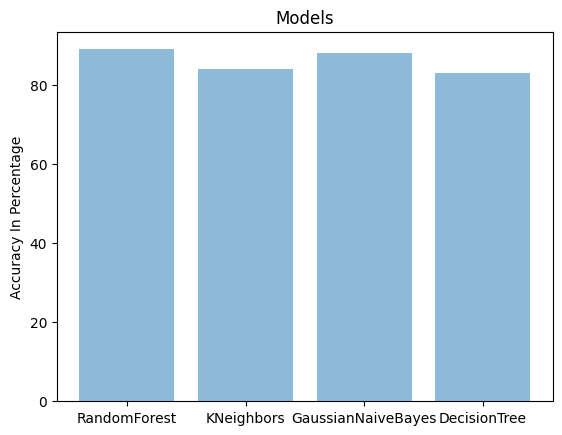

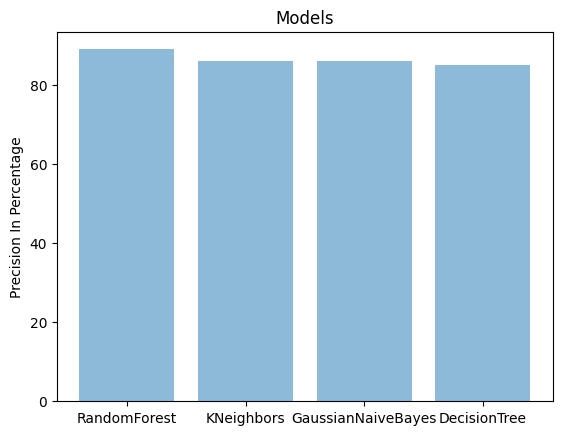

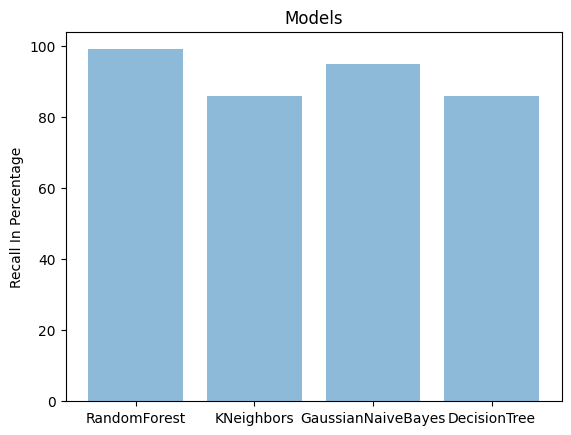

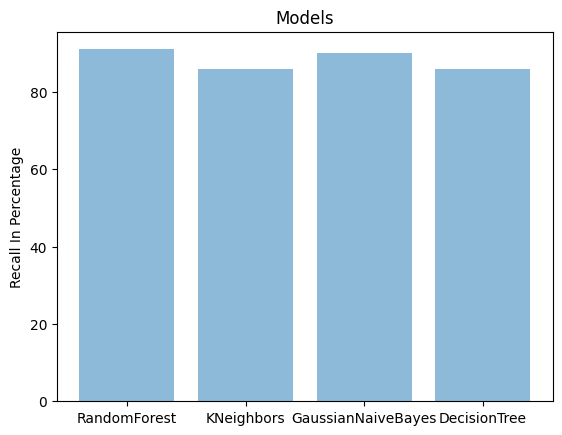

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt



#==============ACCURACY BAR CHART==========

objects = ('RandomForest', 'KNeighbors', 'GaussianNaiveBayes', 'DecisionTree')
y_pos = np.arange(len(objects))
performance = [89,84,88,83]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy In Percentage')
plt.title('Models')

plt.show()



#==============PRECISION BAR CHART==========

objects = ('RandomForest', 'KNeighbors', 'GaussianNaiveBayes', 'DecisionTree')
y_pos = np.arange(len(objects))
performance = [89,86,86,85]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Precision In Percentage')
plt.title('Models')

plt.show()

#==============Recall BAR CHART==========

objects = ('RandomForest', 'KNeighbors', 'GaussianNaiveBayes', 'DecisionTree')
y_pos = np.arange(len(objects))
performance = [99,86,95,86]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Recall In Percentage')
plt.title('Models')

plt.show()

#==============F1 Score BAR CHART==========

objects = ('RandomForest', 'KNeighbors', 'GaussianNaiveBayes', 'DecisionTree')
y_pos = np.arange(len(objects))
performance = [91,86,90,86]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Recall In Percentage')
plt.title('Models')

plt.show()













Visualization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


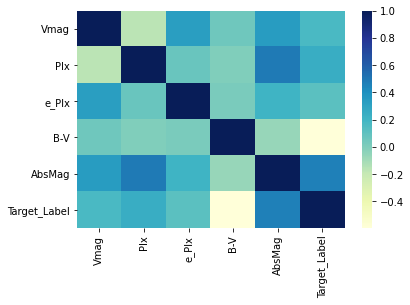

In [ ]:
import seaborn as sns
star_corr= star_dataset_preprocessed.corr()
sns.heatmap(star_corr,cmap = 'YlGnBu')



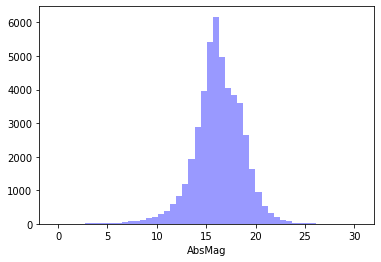

In [ ]:
plot=sns.distplot(star_dataset_preprocessed.AbsMag,kde=False,color='b')


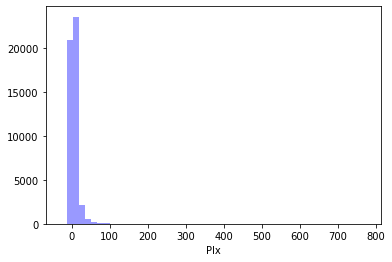

In [ ]:
plot2=sns.distplot(star_dataset_preprocessed.Plx,kde=False,color='b')

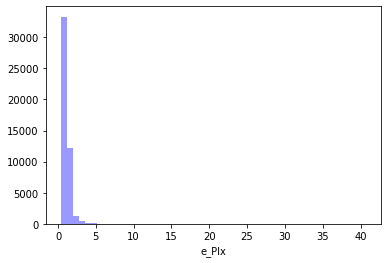

In [ ]:
plot3=sns.distplot(star_dataset_preprocessed.e_Plx,kde=False,color='b')

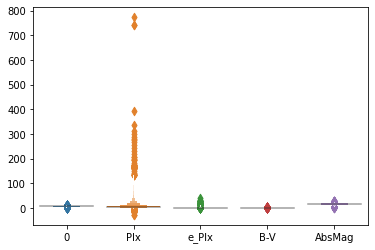

In [ ]:
import seaborn as sns
sns.boxenplot(data=X_pre_train)

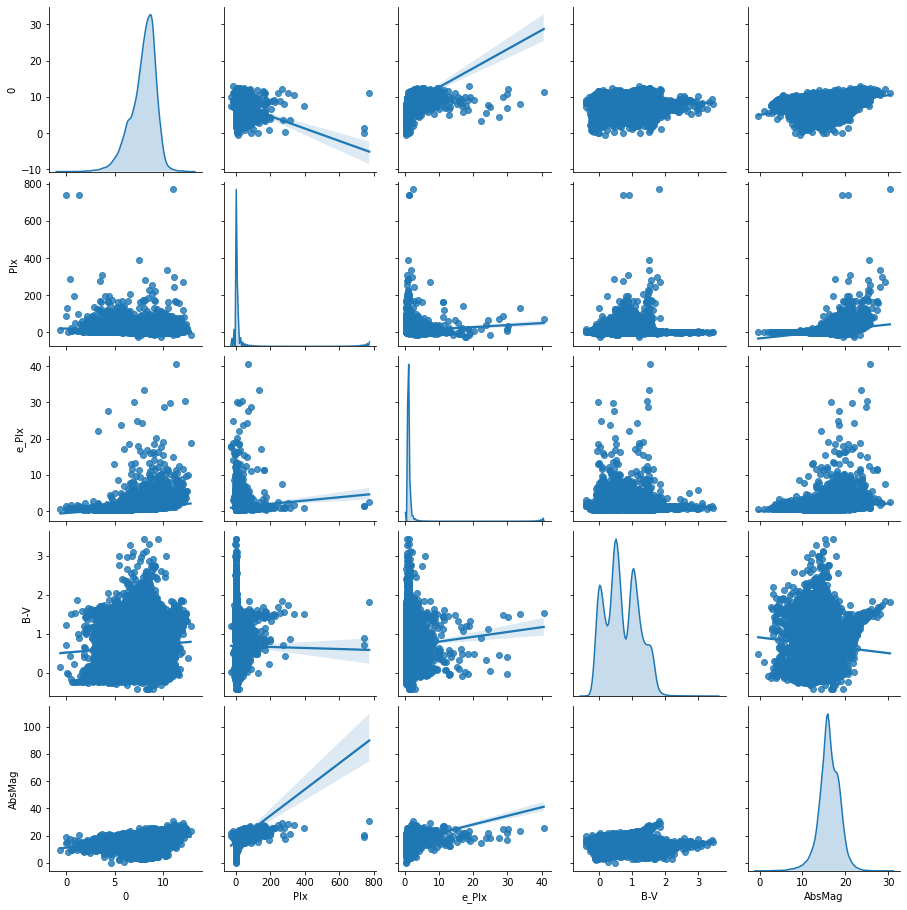

In [ ]:
sns.pairplot(X_pre_train ,kind='reg',diag_kind='kde')

Text(0, 0.5, 'number of stars')

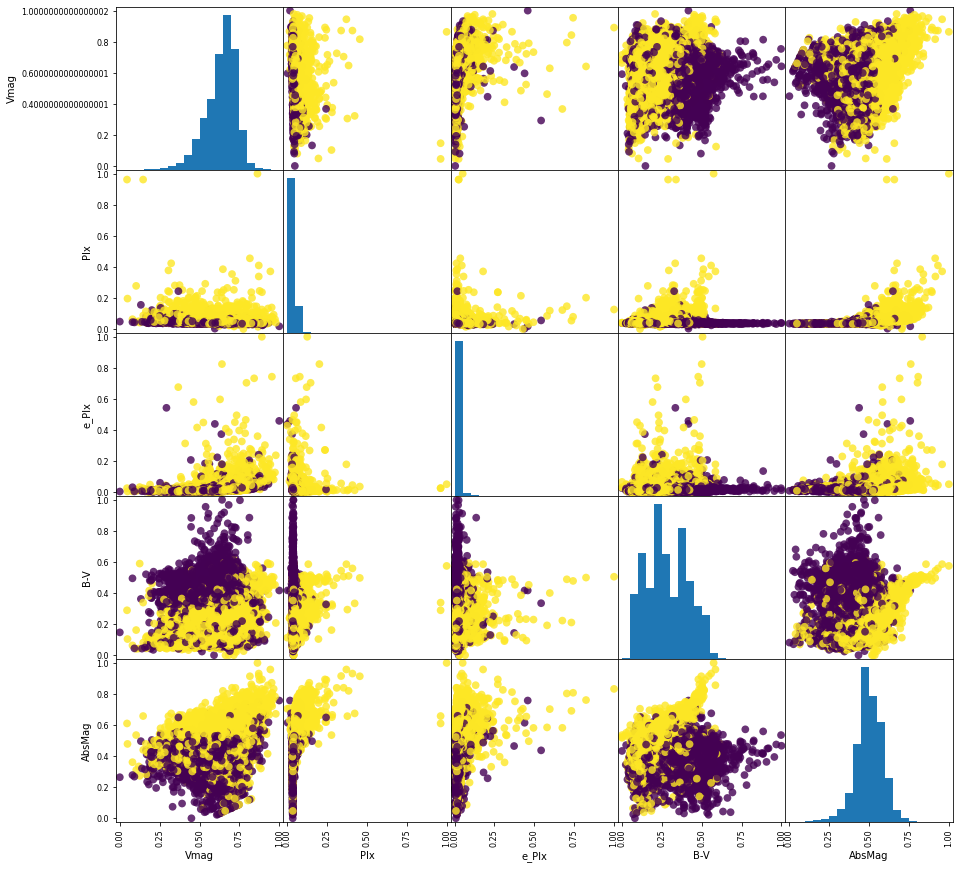

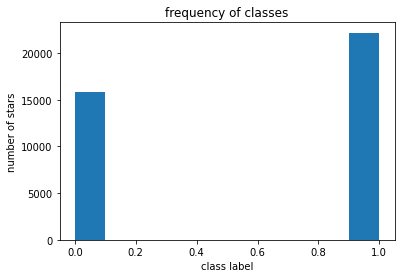

In [ ]:
star_dataframe = pd.DataFrame(x_train, columns=['Vmag','Plx','e_Plx','B-V','AbsMag'])
pd.plotting.scatter_matrix(star_dataframe, c=y_train, figsize=(15,15), marker='o',hist_kwds={'bins':20}, s=60, alpha=0.8)



fig,ax = plt.subplots()
ax.hist(y_train)
ax.set_title('frequency of classes')
ax.set_xlabel('class label')
ax.set_ylabel('number of stars')


In [ ]:
x = X_pre_train.values
y = star_dataset_preprocessed['Target_Label'].values



from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# from sklearn.preprocessing import Normalizer 
# scaler = Normalizer()
# scaler.fit(x_train) 
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

# from sklearn.preprocessing import RobustScaler 
# scaler = RobustScaler()
# scaler.fit(x_train) 
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

# from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler()
# scaler.fit(x_train) 
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=50)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

from sklearn.metrics import recall_score
tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

Accuracy: 0.8888421052631579
Precision: 0.8932004894249257
Recall: 0.9198919891989199
F1 Score: 0.9063497694217808
False Positive Rate: 0.15487959442332067
False Negative Rate: 0.0801080108010801
